In [34]:
prepod_path = "/Users/iakubovskii/Machine_Learning/RANEPA/DataAnalize_ipynb/Экзамен/developer_survey_2020/survey_results_public.csv"
from collections import defaultdict
score_dict = defaultdict(str)
def create_final_score(score_dict):
    exam_scores = pd.DataFrame(score_dict,index=[0]).T.rename(columns = {0:"scores"})
    exam_scores.loc['exam_score'] = exam_scores['scores'].sum()
    return(exam_scores)
score_dict['1_1'] = 5
score_dict['1_2'] = 2
score_dict['1_3'] = 3
score_dict['2'] = 10
score_dict['3_1'] = 2
score_dict['3_2'] = 2
score_dict['3_3'] = 2
score_dict['3_4'] = 4
score_dict['4'] = 10
score_dict['5_1'] = 2
score_dict['5_2'] = 2
score_dict['5_3'] = 4
score_dict['5_4'] = 2
score_dict['6_1'] = 2
score_dict['6_2'] = 2
score_dict['6_3'] = 2
score_dict['6_4'] = 4
score_dict['7_1'] = 2
score_dict['7_2'] = 4
score_dict['7_3'] = 1
score_dict['7_4'] = 3
score_dict['8_1'] = 5
score_dict['8_2'] = 5
score_dict['9_1'] = 5
score_dict['9_2'] = 5
score_dict['10_1'] = 5
score_dict['10_2'] = 5

# <center> Экзамен (26.12.2020) </center>

Поздравляю всех с окончанием курса "Введение в анализ данных с Python"! Надеюсь вам понравилось и вы получили хороший стимул для дальнейшего изучения науки о данных самостоятельно (и не только). В этом экзамене мы проверим, насколько вы усвоили базовые принципы при работе с данными. 

`Предупреждаю, что за одинаковый под копирку код (одинаковое название переменных, идентичные комментарии и т.д.) я буду обнулять как минимум задания, а как максимум ставить сразу 0 за всю работу.` 

**Удачи!**

# Часть 1. Контейнеры и прикладная статистика (40 баллов)

## Задание 1. ФИО (10 баллов)

Напишите функцию (именно функцию), где на вход подается ваше ФИО с одним пробелом между словами, а на выходе в качестве результата выдается словарик, где ключ - буква, а значение - соответствующая ей частота в ФИО. (`5 баллов`). Пробелы мы удаляем в самом теле функции и изменяем регистр на нижний. 

Найдите самую частовстречаемую букву (если их несколько, то выведите все) и самую редковстречаемую букву (если их несколько, выведите все) (`2 балла`).

Вычислите долю гласных букв в ФИО (`3 балла`).

Допустим, что символ "-" согласная буква :)

In [2]:
import numpy as np

# Функция, возвращающая словарик с частотой букв
def letters_freq(full_name):
    trimmed_name = full_name.replace(' ', '').lower()
    return {char: trimmed_name.count(char) for char in trimmed_name}

# Самые часто встречающиеся буквы
char_dict = letters_freq('Валл Федор Викторович')
values = np.array(list(char_dict.values())) # ключи словаря
keys = np.array(list(char_dict.keys())) # значения словаря
most_frequent = keys[np.where(values == values.max())[0]] # самые частые
rarest = keys[np.where(values == values.min())[0]] # самые редкие
print('Самые частые буквы:', most_frequent)
print('Самые редкие буквы:', rarest)

# Доля гласных букв в ФИО
vowels = ['а', 'е', 'ё', 'и', 'о', 'у', 'ы', 'э', 'ю', 'я']
vowels_sum = sum([char_dict[vowel] for vowel in vowels if vowel in char_dict.keys()]) # сумма гласных
share = vowels_sum / sum(char_dict.values()) # доля
print(f'Доля гласных в ФИО: {np.round(share*100, 2)} %')

Самые частые буквы: ['в' 'о']
Самые редкие буквы: ['а' 'ф' 'е' 'д' 'к' 'т' 'ч']
Доля гласных в ФИО: 36.84 %


In [3]:
char_dict

{'в': 3,
 'а': 1,
 'л': 2,
 'ф': 1,
 'е': 1,
 'д': 1,
 'о': 3,
 'р': 2,
 'и': 2,
 'к': 1,
 'т': 1,
 'ч': 1}

## Задание 2. Время (10 баллов)

Вычислите суммарное количество секунд, которое прошло с даты вашего рождения (считаем, что дата начинается с 00:00:00) на момент 26.12.2020 23:59:59. 
Подсказка: воспользуейтесь модулем datetime. 

In [4]:
from datetime import datetime

birthday = datetime(1998, 8, 21) # день рождения
today = datetime(2020, 12, 26, 23, 59, 59) # конечная дата
diff = today - birthday # разница
time_since_birth = diff.days*24*60*60 + diff.seconds # время с рождения
print(f'Время, прошедшее с рождения: {time_since_birth} секунд')

Время, прошедшее с рождения: 705369599 секунд


## Задание 3. Линейная алгебра (10 баллов)

Установите случайный seed, который равен количеству секунд из задания 2. Если по какой-то причине вы не решили это задание, то возьмите в качестве seed 123. 

Создайте при помощи `np.random.rand` матрицу A (10 строк, 5 столбцов) и матрицу B (5 строк и 10 стробцов), а также случайный вектор b (10 строк и 1 столбец).

- Вычислите матричное произведение A и B по правилам линейной алгебры (`2 балла`).

- Решите уравнение Ax = b (`2 балла`)

- Найдите собственные вектора произведения матрицы А на матрицу  B (`2 балла`)

- Найдите оценки МНК (модель без константы) в предположении, что матрица А - это матрица объясняющих факторов, а вектор b - зависимая переменная. (`4 балла`)




In [5]:
np.random.seed(time_since_birth)
A = np.random.rand(10, 5)
B = np.random.rand(5, 10)
b = np.random.rand(10, 1)

A_B = A @ B # A*B
print('Произведение А и В:\n', A_B)

# Первый вариант, если в задании опечатка:
x_1 = np.linalg.inv(A_B) @ b # x = (A^-1) * b
print('\nРешение матричного уравнения:\n', x_1)

# Второй вариант, если в задании все верно и необходимо точное решение:
# точного решения не существует.

# Третий вариант, если в задании все верно и под решением имеется ввиду
# приближение через псевдообратную матрицу: ответ аналогичен МНК-оценкам

_, eigvec = np.linalg.eig(A_B) # собственные значения матрицы A_B
print('\nСобственные векторы матрицы A_B:\n', eigvec)

ols = np.linalg.pinv(A) @ b # МНК-оценки через псевдообратную матрицу
print('\nОценки МНК:\n', ols)

Произведение А и В:
 [[1.347423   1.4624178  1.33958854 1.68263077 0.65233891 1.06209091
  1.15189006 1.32540412 1.41353972 1.41857414]
 [1.30829217 1.01738581 0.73847523 1.32292904 0.88893133 0.78368778
  1.17929361 0.71627438 1.29974628 0.84896737]
 [1.33590393 1.45699306 0.87850509 1.70045194 0.70631931 0.64603789
  0.9784921  0.95124027 1.65924998 1.38950256]
 [0.74142708 0.88941402 0.63965227 0.88778495 0.3704996  0.49903943
  0.60636197 0.76774277 0.90834879 0.74265714]
 [1.89741765 2.38866954 1.7898957  2.55567464 1.06893371 1.52003324
  1.6366884  2.21604722 2.3551616  2.12990138]
 [0.75583986 0.99321861 0.95260102 1.23218626 0.34797705 0.73616917
  0.63435286 0.96669834 0.85299478 1.12112032]
 [1.48777024 1.73485159 1.27915858 1.65765484 0.6365485  0.90144613
  1.16311347 1.43291625 1.77420167 1.42438624]
 [1.26352692 1.39356925 0.86686002 1.13406129 0.64510033 0.69475088
  1.05486288 1.16420734 1.54297594 0.85776175]
 [1.82350685 2.1361359  1.32775402 2.21738409 1.18374799 1.

In [32]:
# точного решения не существует - это верный ответ! :)

## Задание 4. Функции распределения (10 баллов)

Используя модуль `scipy` (метод rvs) и пакеты для визуализации постройте плотности распределения и куммулятивные функции распределения, а также найдите 2.5%, 5%, 95% и 97.5% квантили для следующих случайных величин:

- Нормальная 

- Биномиальная (p = 0.3, n=50)

- Стьюдента (df = 30)

- Хи-квадрат (df = 2)

- Фишера (dfn = 5, dfd = 10)

Правильные графики - `1 балл`, правильные квантили - `1 балл` за каждое распределение.

Везде используем значения loc и scale - по умолчанию. Количество наблюдений (size) = 100. 

In [6]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (16, 7)

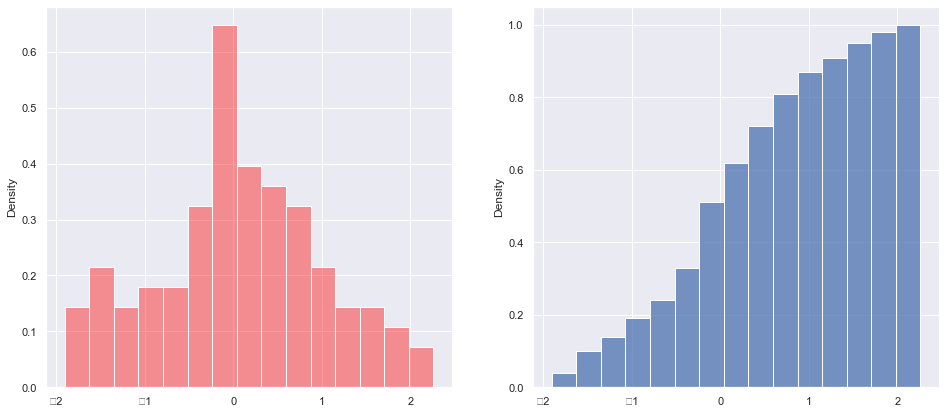

Персентили распределения: [-1.68 -1.54  1.69  1.94]


In [7]:
# Стандартное нормальное распределение
x = stats.norm().rvs(100)
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(x, color = 'red', alpha = 0.4, stat = 'density', bins = 15)
plt.subplot(1, 2, 2)
sns.histplot(x, cumulative = True, stat = 'density', bins = 15)
plt.show()

print(f'Персентили распределения: {np.round(np.percentile(x, [2.5, 5, 95, 97.5]), 2)}')

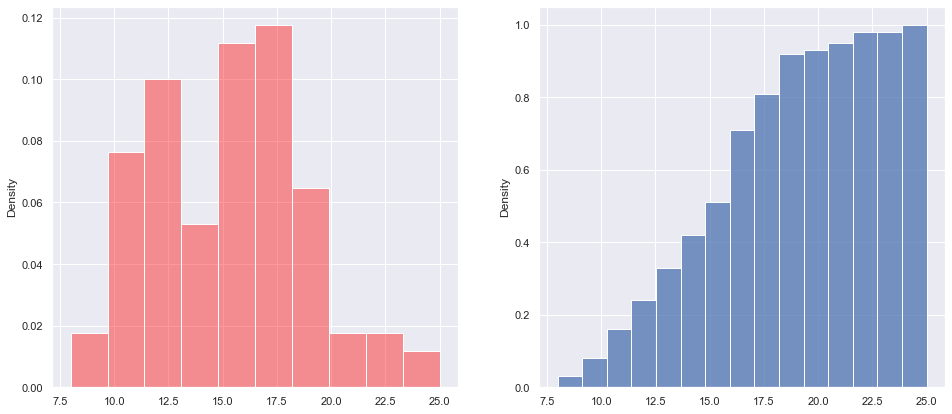

Персентили распределения: [ 8.95 10.   21.05 22.  ]


In [8]:
# Биномиальное распределение с n = 50, p = 0.3
x = stats.binom(50, 0.3).rvs(100)
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(x, color = 'red', alpha = 0.4, stat = 'density', bins = 10)
plt.subplot(1, 2, 2)
sns.histplot(x, cumulative = True, stat = 'density', bins = 15)
plt.show()

print(f'Персентили распределения: {np.percentile(x, [2.5, 5, 95, 97.5])}')

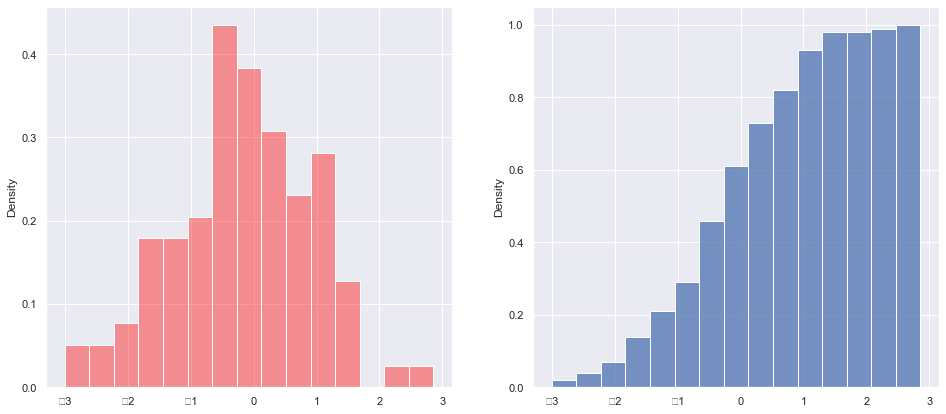

Персентили распределения: [-2.38 -1.99  1.35  1.4 ]


In [9]:
# Распределение Стьюдента с df = 30
x = stats.t(30).rvs(100)
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(x, color = 'red', alpha = 0.4, stat = 'density', bins = 15)
plt.subplot(1, 2, 2)
sns.histplot(x, cumulative = True, stat = 'density', bins = 15)
plt.show()

print(f'Персентили распределения: {np.round(np.percentile(x, [2.5, 5, 95, 97.5]), 2)}')

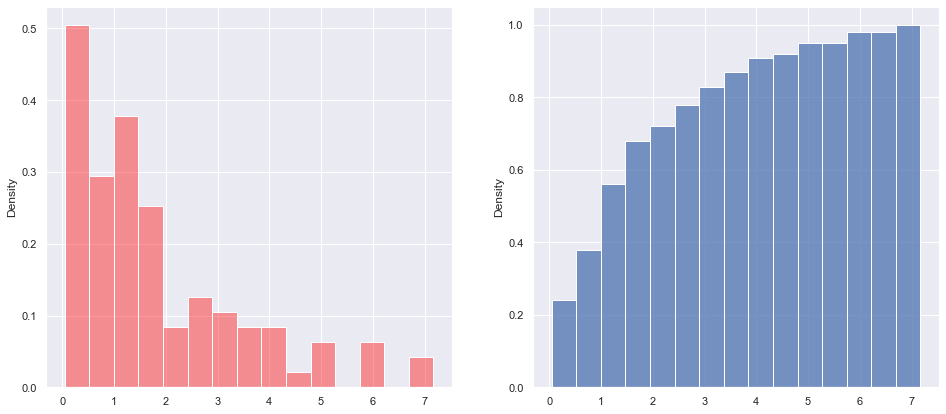

Персентили распределения: [0.08 0.09 5.28 6.06]


In [10]:
# Распределение Хи-квадрат с df = 2
x = stats.chi2(2).rvs(100)
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(x, color = 'red', alpha = 0.4, stat = 'density', bins = 15)
plt.subplot(1, 2, 2)
sns.histplot(x, cumulative = True, stat = 'density', bins = 15)
plt.show()

print(f'Персентили распределения: {np.round(np.percentile(x, [2.5, 5, 95, 97.5]), 2)}')

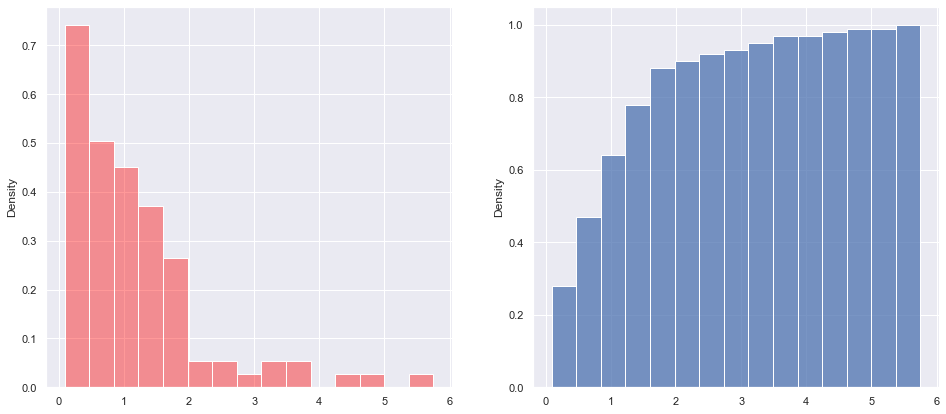

Персентили распределения: [0.13 0.15 3.29 4.15]


In [11]:
# Распределение Фишера с dfn = 5, dfd = 10
x = stats.f(5, 10).rvs(100)
sns.set()
plt.subplot(1, 2, 1)
sns.histplot(x, color = 'red', alpha = 0.4, stat = 'density', bins = 15)
plt.subplot(1, 2, 2)
sns.histplot(x, cumulative = True, stat = 'density', bins = 15)
plt.show()

print(f'Персентили распределения: {np.round(np.percentile(x, [2.5, 5, 95, 97.5]), 2)}')

# Часть 2. Предобработка данных (30 баллов)

Далее вы будете работать с данными опроса пользователей Stack Overflow. Информация об этом опросе ниже.

The Public 2020 Stack Overflow Developer Survey Results

Description:

The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:

1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
3. so_survey_2020.pdf - PDF file of survey instrument

The survey was fielded from February 5 to February 28, 2020. The median time spent on the survey for qualified responses was 16.6 minutes.

Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

As an incentive, respondents who finished the survey could opt in to a "Census" badge if they completed the survey.

You can find the official published results here:

https://insights.stackoverflow.com/survey/2020

Find previous survey results here:

https://insights.stackoverflow.com/survey

Legal:

This database - The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/

TLDR: You are free to share, adapt, and create derivative works from The Public 2020 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.

Acknowledgment:

Massive, heartfelt thanks to all Stack Overflow contributors and lurking developers of the world who took part in the survey this year. We value your generous participation more than you know. <3



## Задание 5. Импорт и работа с  пропусками (10 баллов)

Импортируйте файл `survey_results_public.csv` и посмотрите на распределение значений переменной Gender (`2 балла`). Подсказка: обычный bar plot при методе .value_counts().

Выведите тип и названия столбцов. Сколько количественных и сколько качественных (тип object) переменных (`2 балла`)?

Для каждого столбца вычислите долю пропущенных значений (`4 балла`)

Заполните пропуски для численных переменных медианными значениями (`2 балла`)

In [12]:
import pandas as pd

df = pd.read_csv(prepod_path)
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


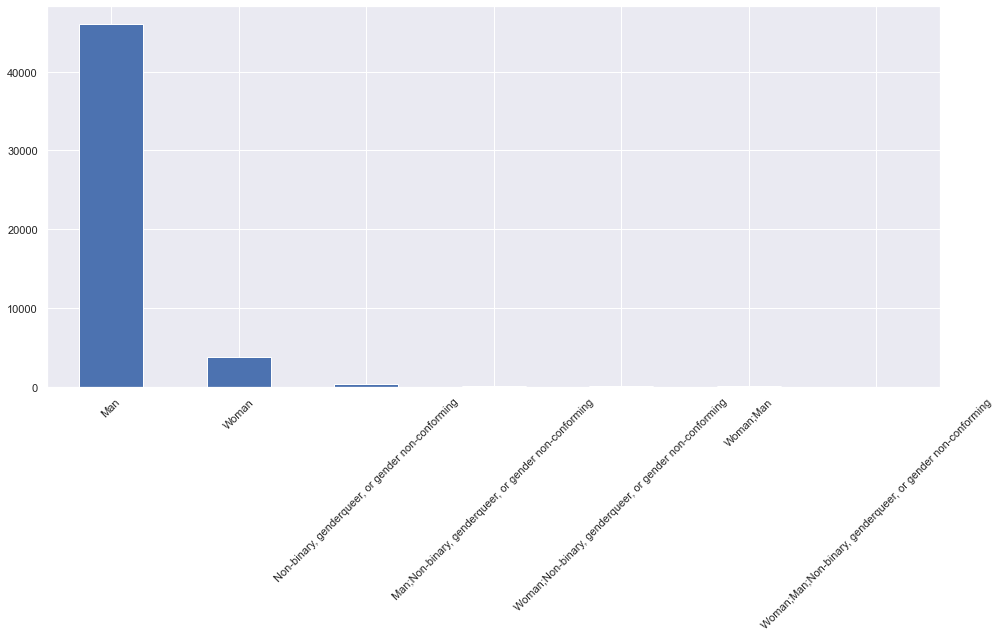

In [13]:
# Распределение респондентов по гендерному признаку
df['Gender'].value_counts().plot(kind = 'bar', rot = 45)
plt.show()

In [14]:
# Информация о датасете
df.info() # 56 качественных переменных и 5 количественных (или 4, если не считать id респондента)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [15]:
# Доля пропущенных значений для каждого столбца
na_share = df.apply(lambda x: np.round(x.isna().sum() / len(df), 3))
na_share

Respondent            0.000
MainBranch            0.005
Hobbyist              0.001
Age                   0.295
Age1stCode            0.102
                      ...  
WebframeWorkedWith    0.344
WelcomeChange         0.183
WorkWeekHrs           0.362
YearsCode             0.105
YearsCodePro          0.281
Length: 61, dtype: float64

In [16]:
# Выделим количественные переменные и заменим пропуски на медианы
num_vars = ['Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs']
df[num_vars] = df[num_vars].replace(np.nan, df[num_vars].median())
df.iloc[:50, :]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,29.0,13,Monthly,63000.0,54049.0,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,29.0,19,NaN,63000.0,54049.0,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,40.0,7,4
2,3,I code primarily as a hobby,Yes,29.0,15,NaN,63000.0,54049.0,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,40.0,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,63000.0,54049.0,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,63000.0,54049.0,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,40.0,15,8
5,6,I am a developer by profession,No,29.0,14,NaN,63000.0,54049.0,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,40.0,6,4
6,7,I am a developer by profession,Yes,29.0,18,Monthly,63000.0,54049.0,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,40.0,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
8,9,I am a developer by profession,No,30.0,20,NaN,63000.0,54049.0,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4


## Задание 6. Описательная статистика (10 баллов)

- Найдите самую популярную страну (`2 балла`)

- Найти средний возраст респондентов (`2 балла`)

- Сколько в среднем в неделю работают респонденты в каждой стране (`2 балла`) 

- Найдите самый популярный язык программирования (`4 балла`). Обратите внимание, что респонденты могут указывать несколько языков программирования. Подсказка: вам нужно сделать следующее: df['LanguageWorkedWith'].str.split(";").explode(). Таким образом, вы разобьете каждый элемент столбца на список и при помощи метода explode получите столбец, где язык программирования встречается один раз.

In [17]:
country = df['Country'].value_counts()
print('Самая популярная страна:', country.index[0])

Самая популярная страна: United States


In [18]:
age = df['Age'].mean()
print('Средний возраст респондентов:', np.round(age, 2))

Средний возраст респондентов: 30.29


In [19]:
mean_hrs = df.groupby('Country')['WorkWeekHrs'].mean()
print('Среднее количество часов работы в неделю по странам:\n', np.round(mean_hrs, 2))

Среднее количество часов работы в неделю по странам:
 Country
Afghanistan                             41.39
Albania                                 44.35
Algeria                                 39.03
Andorra                                 40.46
Angola                                  50.78
                                        ...  
Venezuela, Bolivarian Republic of...    40.07
Viet Nam                                40.79
Yemen                                   40.00
Zambia                                  39.05
Zimbabwe                                39.97
Name: WorkWeekHrs, Length: 183, dtype: float64


In [20]:
prog_lang = df['LanguageWorkedWith'].str.split(";").explode().value_counts()
print('Самый популярный язык программирования:', prog_lang.index[0])

Самый популярный язык программирования: JavaScript


## Задание 7.  Создание дополнительных признаков.

Как вы убедились, численных признаков изначально довольно мало и они очень плохо коррелируют друг с другом. Давайте создадим новые признаки на основании категориальных переменных. 

- Выведите совместное распределение переменных `Sexuality` и `Gender` (т.е. таблица, где по строкам и столбцам эти переменные, а на пересечении - количество наблюдений) (`2 балла`)

- Создайте дамми-переменные для гендерных признаков (отдельно) и сексуальной ориентации (отдельно). Это можно сделать при помощи функции `pd.get_dummies`. Присоедините полученные дамми-переменные к основному датасету (`4 балла`)

- Создайте переменную для количества языков программирования (`1 балл`). Подсказка: создайте столбец со списками языков программирования - ***Language*** и примените к нему функцию len через метод map.

- Создайте дамми-переменные для языков программирования (`3 балла`). Подсказка:
df['R'] = np.where(df['Language'].apply(lambda x: "R" in x if type(x)==list else x), 1,0). Это пример для языка R а вам нужно прогнать цикл по всем языкам программирования.


In [21]:
# Таблица с совместным распределением гендера и сексуальной ориентации
joint_distr = pd.pivot_table(df, index = 'Sexuality', columns = 'Gender', 
                             aggfunc = len, values = 'Age')
joint_distr

Gender,Man,"Man;Non-binary, genderqueer, or gender non-conforming","Non-binary, genderqueer, or gender non-conforming",Woman,Woman;Man,"Woman;Man;Non-binary, genderqueer, or gender non-conforming","Woman;Non-binary, genderqueer, or gender non-conforming"
Sexuality,,,,,,,
Bisexual,1321.0,22.0,75.0,444.0,4.0,2.0,13.0
Bisexual;Gay or Lesbian,20.0,2.0,1.0,11.0,3.0,NaN,3.0
Bisexual;Gay or Lesbian;Queer,3.0,3.0,7.0,11.0,NaN,NaN,NaN
Bisexual;Gay or Lesbian;Straight / Heterosexual,7.0,NaN,NaN,1.0,NaN,NaN,NaN
Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer,9.0,NaN,4.0,3.0,NaN,13.0,1.0
Bisexual;Queer,41.0,14.0,58.0,51.0,2.0,NaN,16.0
Bisexual;Straight / Heterosexual,209.0,6.0,3.0,31.0,2.0,NaN,4.0
Bisexual;Straight / Heterosexual;Queer,6.0,3.0,NaN,NaN,NaN,1.0,NaN
Gay or Lesbian,758.0,2.0,14.0,186.0,NaN,NaN,8.0


In [22]:
# Создание и присоединение колонок с дамми-переменными
gender_df = pd.get_dummies(df['Gender'])
sexuality_df = pd.get_dummies(df['Sexuality'])
df_dummies = df.join([gender_df, sexuality_df])
df_dummies

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer,Bisexual;Queer,Bisexual;Straight / Heterosexual,Bisexual;Straight / Heterosexual;Queer,Gay or Lesbian,Gay or Lesbian;Queer,Gay or Lesbian;Straight / Heterosexual,Queer,Straight / Heterosexual,Straight / Heterosexual;Queer
0,1,I am a developer by profession,Yes,29.0,13,Monthly,63000.0,54049.0,Germany,European Euro,...,0,0,0,0,0,0,0,0,1,0
1,2,I am a developer by profession,No,29.0,19,NaN,63000.0,54049.0,United Kingdom,Pound sterling,...,0,0,0,0,0,0,0,0,0,0
2,3,I code primarily as a hobby,Yes,29.0,15,NaN,63000.0,54049.0,Russian Federation,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,I am a developer by profession,Yes,25.0,18,NaN,63000.0,54049.0,Albania,Albanian lek,...,0,0,0,0,0,0,0,0,1,0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,63000.0,54049.0,United States,NaN,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,29.0,16,NaN,63000.0,54049.0,United States,NaN,...,0,0,0,0,0,0,0,0,0,0
64457,64867,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Morocco,NaN,...,0,0,0,0,0,0,0,0,0,0
64458,64898,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Viet Nam,NaN,...,0,0,0,0,0,0,0,0,0,0
64459,64925,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Poland,NaN,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Создаем переменную с количеством языков программирования, сохраняя NaN
language = df_dummies['LanguageWorkedWith'].dropna().map(lambda x: len(x.split(';')))
drop_index = df_dummies['LanguageWorkedWith'].isna() # индексы пропущенных значений
df_dummies['Lang_num'] = np.nan # изначальное заполнение всех ячеек NaN
df_dummies.loc[~drop_index, 'Lang_num'] = language # заполнение ячеек, где нет NaN

In [24]:
# Создаем дамми-переменные для языков программирования
for lang in prog_lang.index.unique():
    df_dummies[lang] = np.nan
    df_dummies.loc[~drop_index, lang] = np.where(df_dummies['LanguageWorkedWith']\
                                                 .dropna().map(lambda x: lang in x), 1, 0)

In [25]:
df_dummies

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,VBA,Swift,R,Rust,Objective-C,Dart,Scala,Perl,Haskell,Julia
0,1,I am a developer by profession,Yes,29.0,13,Monthly,63000.0,54049.0,Germany,European Euro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a developer by profession,No,29.0,19,NaN,63000.0,54049.0,United Kingdom,Pound sterling,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,I code primarily as a hobby,Yes,29.0,15,NaN,63000.0,54049.0,Russian Federation,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,I am a developer by profession,Yes,25.0,18,NaN,63000.0,54049.0,Albania,Albanian lek,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,63000.0,54049.0,United States,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,29.0,16,NaN,63000.0,54049.0,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64457,64867,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Morocco,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
64458,64898,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,29.0,NaN,NaN,63000.0,54049.0,Poland,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Часть 3. Тестирование гипотез и моделирование (30 баллов)





## Задание 8. (10 баллов)

- Различается ли статистически распределение по возрасту для программистов на Python и  JavaScript? (`5 баллов`)

- Различается ли статистически количество языков программирования для `Bisexual` и `Gay or Lesbian`? (`5 баллов`)

Тест Харке-Бера:
0.0 0.0

Тест Манна-Уитни:
2.371144672210809e-47


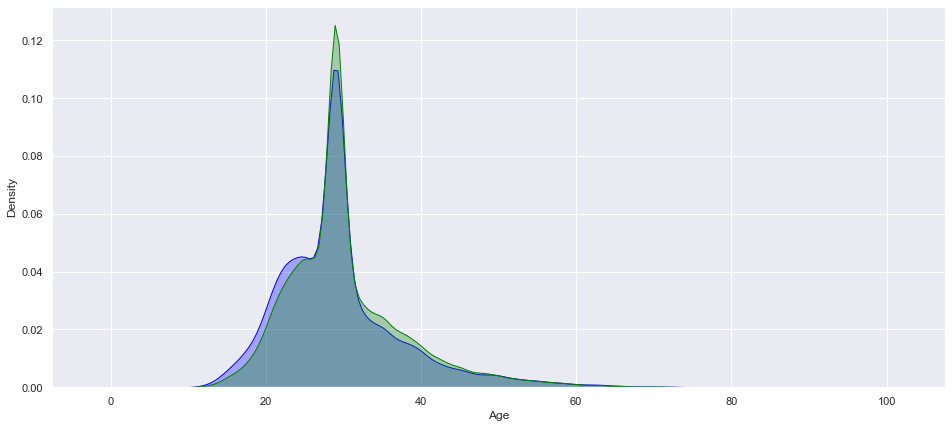

In [26]:
from scipy.stats import mannwhitneyu
from scipy.stats import jarque_bera

# Проверим распределение выборок на нормальность
_, p_value_jb_python = jarque_bera(df_dummies[df_dummies['Python'] == 1]['Age'])
_, p_value_jb_js = jarque_bera(df_dummies[df_dummies['JavaScript'] == 1]['Age'])
print('Тест Харке-Бера:')
print(p_value_jb_python, p_value_jb_js) # H0 отвергается, выборки не нормальные

# Используем непараметрический критерий Манна-Уитни для проверки однородности выборок
_, p_value_mw = mannwhitneyu(df_dummies[df_dummies['Python'] == 1]['Age'], 
                       df_dummies[df_dummies['JavaScript'] == 1]['Age'])
print('\nТест Манна-Уитни:')
print(p_value_mw) # H0 отвергается, выборки взяты из разных генеральных совокупностей

sns.kdeplot(df_dummies[df_dummies['Python'] == 1]['Age'], fill = True, alpha = 0.3, color = 'blue')
sns.kdeplot(df_dummies[df_dummies['JavaScript'] == 1]['Age'], fill = True, alpha = 0.3, color = 'green')
plt.show()

# Статистически распределения по возрасту отличаются, но визуально очень схожи

Тест Харке-Бера:
0.0 0.0

Тест Манна-Уитни:
0.21549269258703596


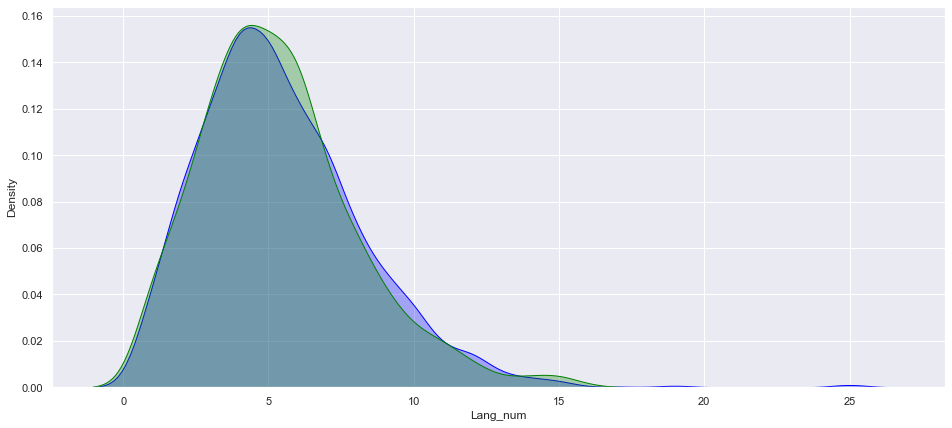

In [27]:
# Проверим распределение выборок на нормальность
_, p_value_jb_bs = jarque_bera(df_dummies[df_dummies['Bisexual'] == 1]['Lang_num'].dropna())
_, p_value_jb_gl = jarque_bera(df_dummies[df_dummies['Gay or Lesbian'] == 1]['Lang_num'].dropna())
print('Тест Харке-Бера:')
print(p_value_jb_bs, p_value_jb_gl) # H0 отвергается, выборки не нормальные

# Используем непараметрический критерий Манна-Уитни для проверки однородности выборок
_, p_value_mw_2 = mannwhitneyu(df_dummies[df_dummies['Bisexual'] == 1]['Lang_num'].dropna(), 
                               df_dummies[df_dummies['Gay or Lesbian'] == 1]['Lang_num'].dropna())
print('\nТест Манна-Уитни:')
print(p_value_mw_2) # H0 не отвергается, выборки взяты из одной генеральной совокупности

sns.kdeplot(df_dummies[df_dummies['Bisexual'] == 1]['Lang_num'], fill = True, alpha = 0.3, color = 'blue')
sns.kdeplot(df_dummies[df_dummies['Gay or Lesbian'] == 1]['Lang_num'], fill = True, alpha = 0.3, color = 'green')
plt.show()

# Распределения статистически и визуально похожи друг на друга

## Задание 9. (10 баллов)

- Постройте регрессию (с константой), где зависсимая переменная - число языков программирования, а объясняющая - дамми переменные для языка Python, R, Javascript. Проинтерпретируйте результаты (значимость и коэффициент) (`5 баллов`)

- Какие языки программирования наиболее популярны среди Sexuality != Straight / Heterosexual ? (`5 баллов`)

In [28]:
import statsmodels.api as sm

linreg_data = df_dummies[['Lang_num', 'Python', 'R', 'JavaScript']].dropna()
X = linreg_data[['Python', 'R', 'JavaScript']]
y = linreg_data['Lang_num']

model = sm.OLS(y, sm.add_constant(X))
print(model.fit().summary())

# Регрессия значима в целом (F-тест), а также значимы все регрессоры (t-test), 
# т.е. они оказывают влияние на число языков программирования 
# Примечательно, что если человек знает JavaScript, то это в большей степени
# увеличивает количество языков программирования по сравнению с R и Python.
# Вероятно, это связано с тем, что JavaScript более сложный в изучении, и за него берутся,
# уже имея опыт программирования в других более простых языках.

                            OLS Regression Results                            
Dep. Variable:               Lang_num   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:21:08   Log-Likelihood:            -1.2449e+05
No. Observations:               57378   AIC:                         2.490e+05
Df Residuals:                   57374   BIC:                         2.490e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2467      0.018    125.515      0.0

In [29]:
prog_lang_2 = df_dummies[df_dummies['Sexuality'] != 'Straight / Heterosexual']['LanguageWorkedWith']\
              .str.split(";").explode().value_counts()
print('Самый популярный язык программирования среди ненатуралов:', prog_lang_2.index[0])

Самый популярный язык программирования среди ненатуралов: JavaScript


## Задание 10. (10 баллов)

- Постройте регрессию (с константой), где в качестве зависимой переменной выступает количество языков программирования, а в качестве объясняющих - возраст и количество рабочих часов. Проинтерпретируйте результаты (значимость, коэффициенты) (`5 баллов`).

- Постройте при помощи бутстрапа 95% доверительный интервал для возраста респондентов. Проинтерпретируйте результаты. (`5 баллов`)

In [30]:
ols_data = df_dummies[['Lang_num', 'Age', 'WorkWeekHrs']].dropna()
X = ols_data[['Age', 'WorkWeekHrs']]
y = ols_data['Lang_num']

model = sm.OLS(y, sm.add_constant(X))
print(model.fit().summary())

# Регрессия значима в целом, а также значимы все коэффициенты.
# Возраст отрицательно сказывается на количестве языков программирвоания,
# а количество часов работы в неделю - положительно. В среднем же респонденты
# знают около 5-6 языков программирования.
# Больше всего вопросов вызывает влияние переменной "Возраст". Скорее всего,
# в регрессии упущены какие-то очень важные факторы, объясняющие такое поведение модели.
# Это подтверждает и очень низкий коэффициент детерминации.

                            OLS Regression Results                            
Dep. Variable:               Lang_num   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sat, 09 Jan 2021   Prob (F-statistic):           6.33e-60
Time:                        19:21:08   Log-Likelihood:            -1.3776e+05
No. Observations:               57378   AIC:                         2.755e+05
Df Residuals:                   57375   BIC:                         2.756e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5490      0.051    109.380      

In [31]:
bs_samples = np.random.choice(df['Age'], size = (len(df['Age']), 1000),
                             replace = True) # 1000 бутстрэп выборок возраста
conf_int = np.percentile(bs_samples.mean(axis = 0), [2.5, 97.5]) # персентили средних
print('95% доверительный интервал для возраста:', conf_int)

# 95% респондентов имеют возраст от ~30.23 до ~30,35 лет

95% доверительный интервал для возраста: [30.23046094 30.35841466]


In [35]:
create_final_score(score_dict)

,scores
1_1,5
1_2,2
1_3,3
2,10
3_1,2
3_2,2
3_3,2
3_4,4
4,10
5_1,2
